In [64]:
import matplotlib.pyplot as plt
import spacy

from collections import Counter
from wordcloud import WordCloud

In [104]:
fname = '/Users/fordhiggins/basketball/analytics/data/cba_files/nhl_cba.txt'

with open(fname, 'r') as f:
    txt = f.read()

In [7]:
[x.split() for x in txt][:5]

[['Table', 'of', 'Contents', 'i'],
 [],
 [],
 ['COLLECTIVE', 'BARGAINING', 'AGREEMENT'],
 []]

In [53]:
words = ' '.join(txt.split())

In [12]:
nlp = spacy.load('en')

In [105]:
len(txt)

1204058

In [106]:
len(txt) < 1500000

True

In [18]:
nlp.max_length = 1500000

In [54]:
doc = nlp(words)

In [61]:
lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

In [62]:
ctr = Counter(lemmas)

In [96]:
# need to figure out the apostrophe
ctr.most_common(20)

[('player', 4098),
 ('team', 2572),
 ('shall', 2391),
 ('salary', 2088),
 ('section', 1974),
 ('nba', 1722),
 ('contract', 1679),
 ('year', 1320),
 ('’s', 1157),
 ('cap', 1117),
 ('article', 1060),
 ('season', 1024),
 ('provide', 934),
 ('players', 725),
 ('agreement', 722),
 ('1', 681),
 ('include', 661),
 ('the', 657),
 ('association', 657),
 ('compensation', 596)]

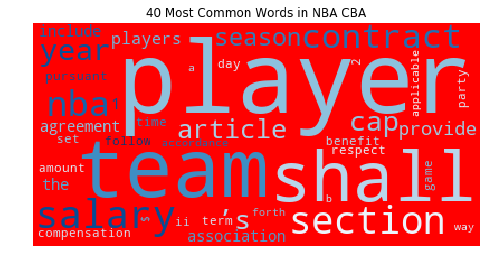

In [95]:
wtups = ctr.most_common(40)
wdict = dict(wtups)

wordcloud = WordCloud(background_color='red', colormap='Blues')
wordcloud.fit_words(wdict)

fig=plt.figure(figsize=(8, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('40 Most Common Words in NBA CBA')
plt.savefig('../../results/viz/nba_cba_wordcloud_30.png')
plt.show()
